In [4]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Problem statement

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Taken from: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

Tutorial: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

# Data

We have downloaded a csv file `train.csv`.

## First look

In [5]:
train = pd.read_csv('train.csv')

In [27]:
print('There are {} columns and {} rows.'.format(len(train.columns), len(train.index)))

There are 13 columns and 614 rows.


In [14]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Quick data exploration

In [69]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can see that the following have missing values:

In [74]:
print('Missing values')
abs(train.describe().T['count'] - len(train.index))

Missing values


ApplicantIncome       0.0
CoapplicantIncome     0.0
LoanAmount           22.0
Loan_Amount_Term     14.0
Credit_History       50.0
Name: count, dtype: float64

## Numerical values

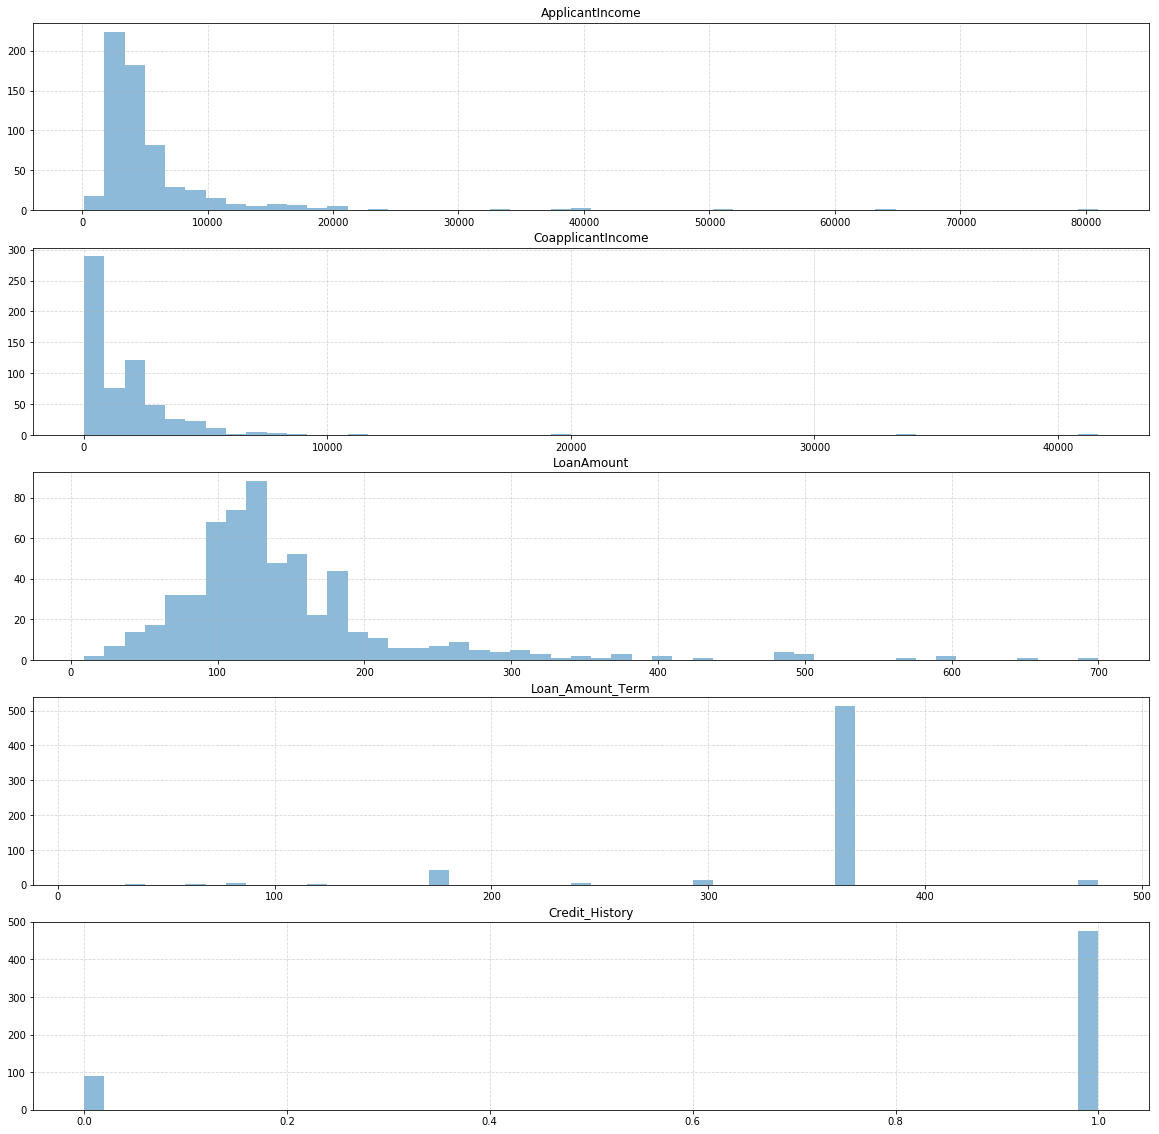

In [170]:
names=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for i in range(len(names)):
    plt.subplot2grid((len(names), 1), (i, 0))
    train[names[i]].hist(bins=50, alpha=.5)
    plt.title(names[i])
    plt.grid(ls='dashed', alpha=.5)

## Non-numerical values

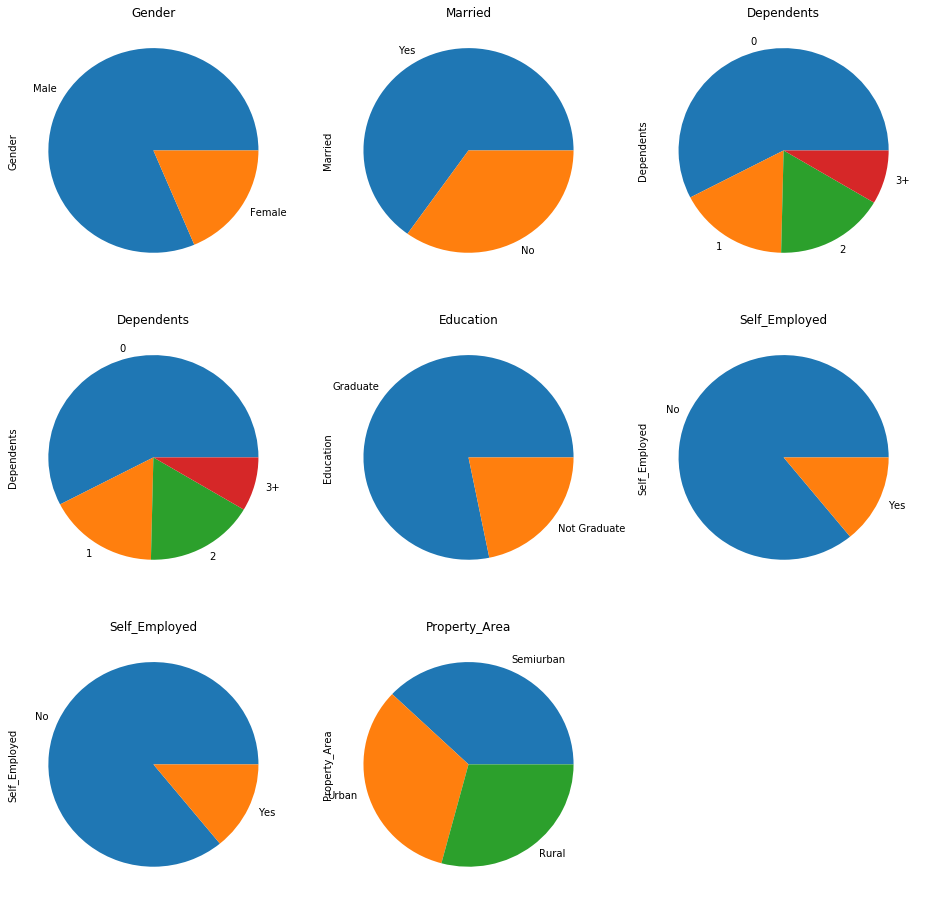

In [151]:
names=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
size=16
for col in range(3):
    for row in range(3):
        if col+row==4: break
        index=2*row+col
        plt.subplot2grid((3,3), (row, col))
        train[names[index]].value_counts().plot.pie(figsize=(size,size), title=names[index])

# Distribution analysis

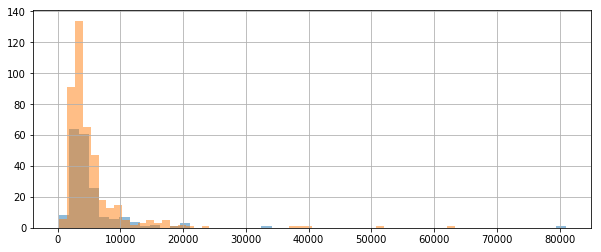

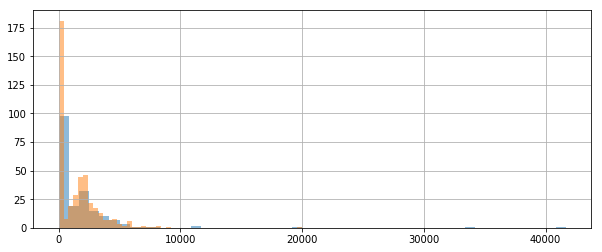

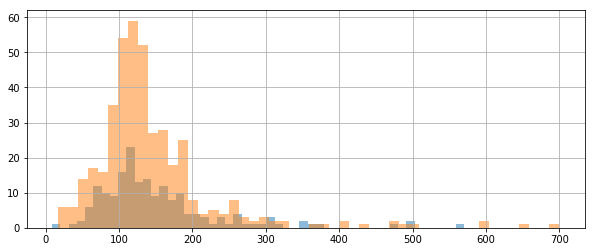

In [166]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    train.groupby('Loan_Status')[col].hist(bins=50, alpha=0.5, figsize=(10,4))
    plt.show()

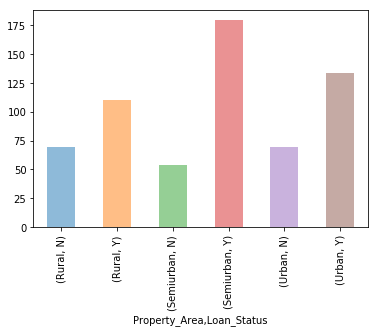

In [65]:
train.groupby(['Property_Area', 'Loan_Status']).count()['Loan_ID'].plot.bar(alpha=0.50);

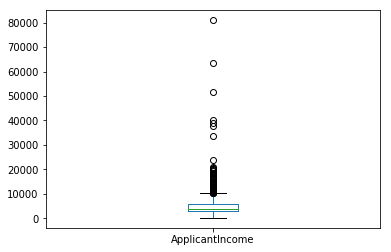

In [12]:
train['ApplicantIncome'].plot.box()